Linear Regression Model for Predicting Medical Insurance Prices

In [228]:
# Import necessary libraries
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

In [229]:
# Set up labels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('CSV Files\insurance.csv')

print(data)

y = data.loc[:,['charges']]
X = data.drop(columns=['charges'])

OE = OrdinalEncoder()

encoded_features_df = X.loc[:, ['sex', 'smoker', 'region']]

encoded_features_df = pd.DataFrame(OE.fit_transform(encoded_features_df), columns=['sex','smoker','region'])


transformed_X = pd.concat([X.drop(columns=['sex', 'smoker','region']), encoded_features_df], axis=1)


#reorder columns
transformed_X = transformed_X[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

transformed_data = pd.concat([transformed_X, y], axis=1)



      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [230]:
# Set up train/test data (print)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.3, random_state=16)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      age  sex     bmi  children  smoker  region
940    18  1.0  23.210         0     0.0     2.0
1278   39  1.0  29.925         1     1.0     0.0
301    53  0.0  22.610         3     1.0     0.0
532    59  1.0  29.700         2     0.0     2.0
963    46  1.0  24.795         3     0.0     0.0
...   ...  ...     ...       ...     ...     ...
635    64  1.0  38.190         0     0.0     0.0
581    19  1.0  30.590         0     0.0     1.0
121    18  1.0  23.750         0     0.0     0.0
1262   41  0.0  28.050         1     0.0     2.0
681    19  1.0  20.300         0     0.0     3.0

[936 rows x 6 columns]
          charges
940    1121.87390
1278  22462.04375
301   24873.38490
532   12925.88600
963    9500.57305
...           ...
635   14410.93210
581    1639.56310
121    1705.62450
1262   6770.19250
681    1242.26000

[936 rows x 1 columns]
      age  sex    bmi  children  smoker  region
1035   54  0.0  23.00         3     0.0     3.0
1297   28  0.0  26.51         2     0.0     2.0
524 

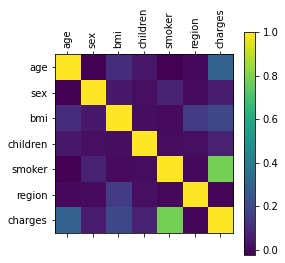

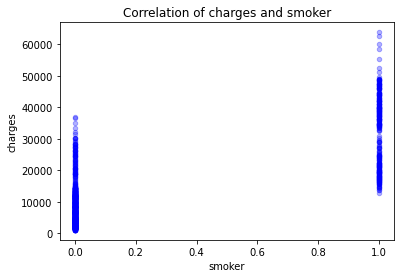

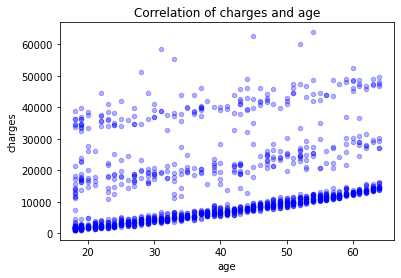

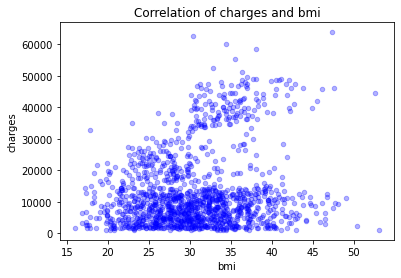

In [231]:
# Visualize data


plt.matshow(transformed_data.corr())
plt.xticks(np.arange(7), transformed_data.columns, rotation=90)
plt.yticks(np.arange(7), transformed_data.columns, rotation=0)
plt.colorbar()
plt.show()

def plot(x_label, y_label):
    graph_data = pd.concat([transformed_data.loc[:, [x_label]], transformed_data.loc[:, [y_label]]], axis=1)
    
    graph_data.plot(kind='scatter',x=x_label,y=y_label,color='blue', alpha=0.3, title=f'Correlation of {y_label} and {x_label}')

plot('smoker','charges')
plot('age', 'charges')
plot('bmi', 'charges')

In [232]:
# Train Linear Regression Model
from sklearn.linear_model import LinearRegression

# Set up train/test data (print)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.3, random_state=16)
'''print(X_train)
print(y_train)
print(X_test)
print(y_test)'''

reg = LinearRegression().fit(X_train, y_train)
print('score:', reg.score(transformed_X, y))

score: 0.7496827933346266


RMSE: 6266.683433415287


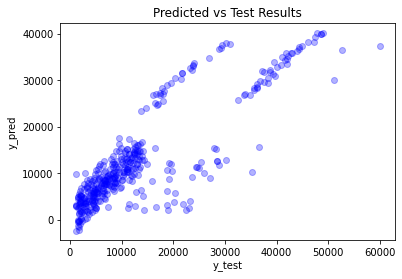

In [233]:
# prediction models
from sklearn import metrics


y_pred = reg.predict(X_test)


plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(x=y_test, y=y_pred, color='blue', alpha=0.3)
plt.title('Predicted vs Test Results')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


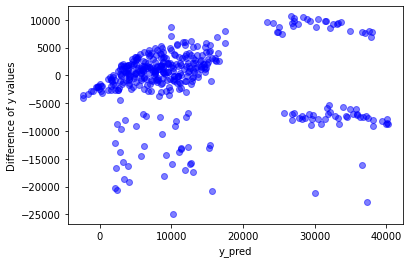

In [234]:
# Score Evaluation Model


plt.xlabel('y_pred')
plt.ylabel('Difference of y values')
plt.scatter(y_pred, y_pred - y_test, color = 'blue', alpha = 0.5)

